# Regresión lineal

En esta sesión vamos a hacer una regresión lineal, primero con una variable y después con varias variables.

En Python existen múltiples bibliotecas que permiten hacer regresiones lineales:

- [scikit-learn](https://scikit-learn.org): muy usada para *machine learning*.
- [Scipy](https://scipy.org): usada principalmente para álgebra y optimización.
- [statsmodels](https://www.statsmodels.org/stable/index.html): usada para econometría.


## scikit-learn

Para ello, seguiremos el [ejemplo de regresión lineal](https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html) de la biblioteca `scikit-learn`.

Cargaremos con la función [`load_diabetes`](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) el dataset correspondiente a [diabetes](https://scikit-learn.org/1.5/datasets/toy_dataset.html#diabetes-dataset).

In [34]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el diabetes dataset
datasets.load_diabetes(as_frame=True, scaled=False)

{'data':       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
 1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
 2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
 3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
 4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
 439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
 440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
 441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0
 
 [442 rows x 10 columns],
 'target': 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438

In [5]:
X, y = datasets.load_diabetes(return_X_y=True, scaled=False)

print(X)

[[59.      2.     32.1    ...  4.      4.8598 87.    ]
 [48.      1.     21.6    ...  3.      3.8918 69.    ]
 [72.      2.     30.5    ...  4.      4.6728 85.    ]
 ...
 [60.      2.     24.9    ...  3.77    4.1271 95.    ]
 [36.      1.     30.     ...  4.79    5.1299 85.    ]
 [36.      1.     19.6    ...  3.      4.5951 92.    ]]


Text(0, 0.5, 'Diabetes en un año')

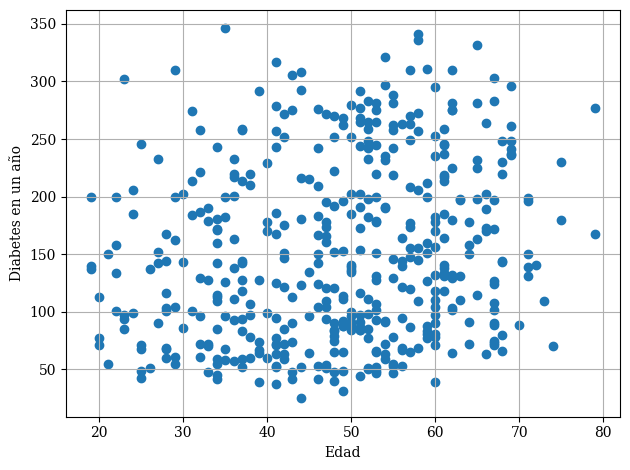

In [35]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], y)
plt.xlabel('Edad')
plt.ylabel('Diabetes en un año')

Text(0, 0.5, 'Diabetes en un año')

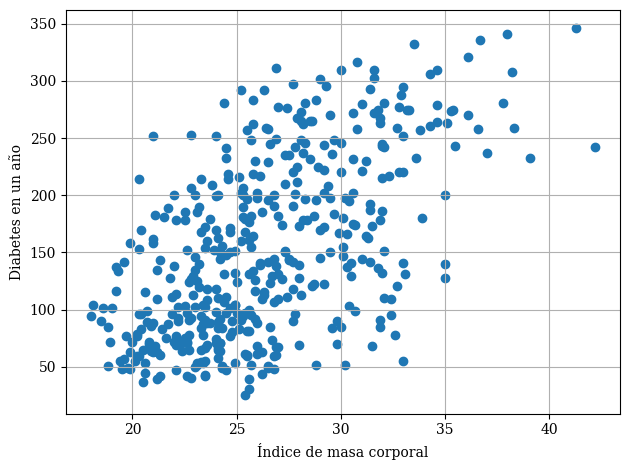

In [36]:
plt.scatter(X[:,2], y)
plt.xlabel('Índice de masa corporal')
plt.ylabel('Diabetes en un año')

Text(0, 0.5, 'Diabetes en un año')

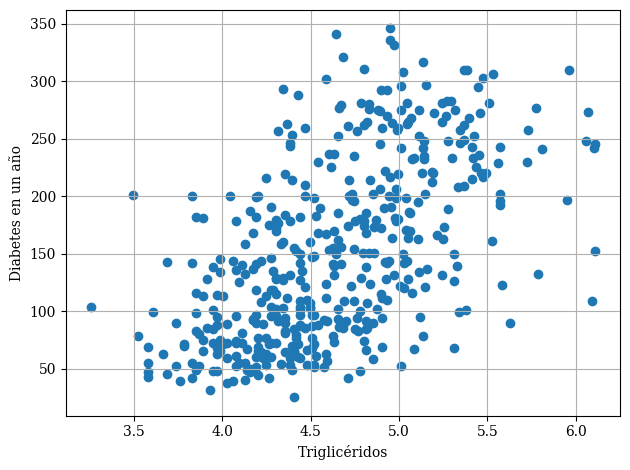

In [37]:
plt.scatter(X[:,8], y)
plt.xlabel('Triglicéridos')
plt.ylabel('Diabetes en un año')

Coeficientes: [10.23312787]
Intercepto: -117.77336656656527
Mean squared error: 3890.46
R cuadrado: 0.34


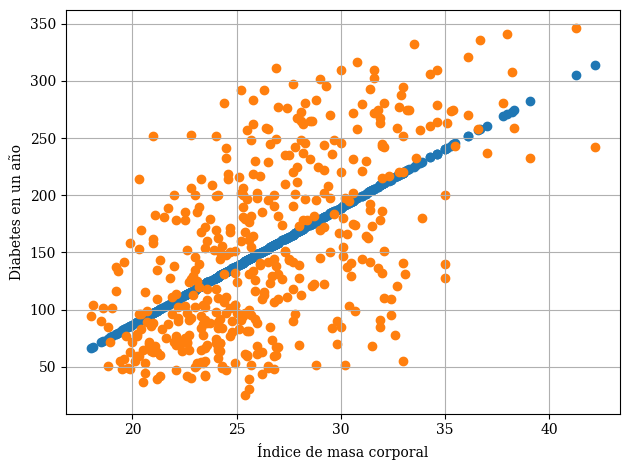

In [46]:
regr = linear_model.LinearRegression()

regr.fit(X[:,2:3], y)

m = regr.coef_
n = regr.intercept_

x = X[:,2]

y_pred = m*x + n

plt.scatter(x, y_pred)
plt.scatter(x, y)

plt.xlabel('Índice de masa corporal')
plt.ylabel('Diabetes en un año')

print(f"Coeficientes: {regr.coef_}")
print(f"Intercepto: {regr.intercept_}")
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("R cuadrado: %.2f" % r2_score(y, y_pred))

In [45]:
regr = linear_model.LinearRegression()

regr.fit(X, y)

y_pred = X @ regr.coef_ + regr.intercept_

print(f"Coeficientes: {regr.coef_}")
print(f"Intercepto: {regr.intercept_}")
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("R cuadrado: %.2f" % r2_score(y, y_pred))

Coeficientes: [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
Intercepto: -334.5671385187874
Mean squared error: 2859.70
R cuadrado: 0.52
